In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , r2_score


%matplotlib inline

In [67]:
def GradientDescent(x,y, theta, eta, epsilon):

    # define variables 
    costs = []
    thetas = []
    m = len(x)
    theta_new = np.zeros(2)
    # calc y_pred based on inital theta
    theta = np.array(theta)
    x= np.array(x)
    y = np.array(y)
    
    # plot original data points 
    plt.scatter(x,y)
    plt.xlabel("input")
    plt.ylabel("outputu")
    plt.title("Grradient Descent")
    
    
    # get intial prediction based on initial thetas
    y_pred = theta[0] + theta[1]*x
   
    #calculate cost function
    thetas.append(theta)
    
    
    cost = sum(pow((y_pred - y),2)) / (m)
    costs.append(cost)
    
    theta_new[0] = theta[0] - eta * (1/m) * sum((y_pred - y))
    theta_new[1] = theta[1] - eta * (1/m) * sum((y_pred - y)* x)
    thetas.append(theta_new)
    plt.plot(x,y_pred)
    # counter to control when to plot
    c = 0

    ## detect convergence :
    while abs(theta_new[0] - theta[0]) > epsilon :
        theta = list(theta_new)
        y_pred = theta[0] + theta[1]*x
        cost = sum(pow((y_pred - y),2)) /(m)
        costs.append(cost)
        
        theta_new = np.zeros(2)
        theta_new[0] = theta[0] - eta * (1/m) * sum((y_pred - y))
        theta_new[1] = theta[1] - eta * (1/m) * sum((y_pred - y)* x)
        thetas.append(theta_new)
        if c%100 == 0 :
            plt.plot(x,y_pred)
        
        c+=1
        thetas.append(theta_new)
        
        

    plt.show()
    return thetas, costs, y_pred


### Testing Gradient Descent Function

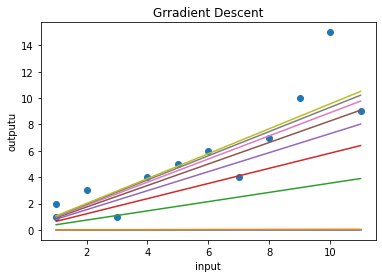

MSE = 3.8935 
R-Squared = 0.7527


In [68]:
# adjuct those parameters for your use case

x = [1,1,2,3,4,5,6,7,8,9,10,11]
y = [1,2,3,1,4,5,6,4,7,10,15,9]
theta = [0,0]
eta = 0.0001
epsilon = 0.00001


thetas , costs , y_pred = GradientDescent(x,y,theta,eta,epsilon)


MSE = mean_squared_error(y, y_pred)

r2 = r2_score(y, y_pred)

print("MSE = {:.4f} \nR-Squared = {:.4f}".format(MSE,r2))

### Regression Line Plot

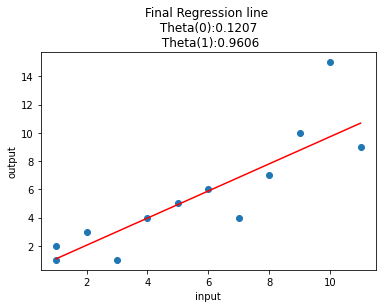

In [69]:

plt.figure(1)
plt.scatter(x,y)
plt.plot(x,y_pred, c="red")
plt.xlabel("input")
plt.ylabel("output")
plt.title("Final Regression line \n Theta(0):{:.4f} \n Theta(1):{:.4f}".format(thetas[-1][0], thetas[-1][1]))
plt.show()

###  Cost Function Plot

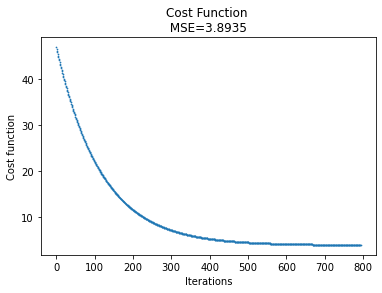

In [70]:
plt.figure(2)
plt.scatter(np.arange(len(costs)) , costs, s=0.5)
plt.title("Cost Function \n MSE={:0.4f} ".format(costs[-1]))
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.show()